<a href="https://colab.research.google.com/github/wsq-siquan/introml/blob/master/Copy_of_model_sel_inclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Selection In-Class Exercise

In this example, you will a linear model to data and select the model order by model order selection.  First load the standard packages.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy.polynomial.polynomial as poly

## Load the Data

The data in this exercise is completely synthetic.  You can load it with the following commmand.

In [0]:
fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit04_model_sel/synth_data.p'
fn_dst = 'synth_data.p'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

with open(fn_dst,'rb') as fp:
    x,y = pickle.load(fp)

File synth_data.p is already downloaded


Plot the data `y` vs. `x` using a scatter plot. 

Text(0, 0.5, 'y')

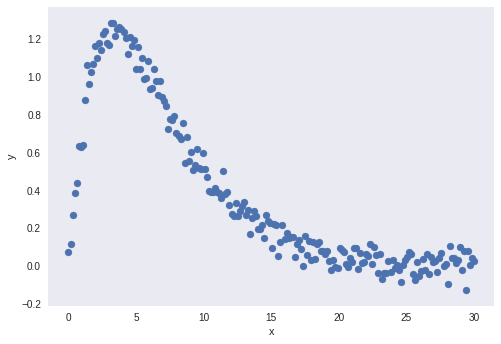

In [0]:
# TODO
plt.scatter(x,y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')


## Fit the Data

We will now try to fit the data.  First, split the data into training and test.  You can use the `train_test_split()` method in the `sklearn` package.

In [0]:
# TODO
# xtr, xts, ytr, yts = train_test_split(...)
xtr, xts, ytr, yts = train_test_split(x,y,test_size=0.7, random_state=42)

beta_hat = poly.polyfit(xtr, ytr, 6)

Now try to fit a linear model to the data.  You can pick any linear model with a variable number `d` of basis functions.  For example, you can use the polynomials up to degree `d-1`.  

For each model order `d`:
* Fit the model on the training data
* Test the model on the test data

Plot the test error vs. `d`.  Select the model order `dopt` with the lowest test error.

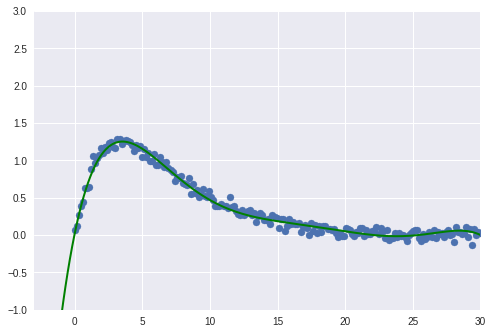

In [0]:
# TODO
xp = np.linspace(-3,30,200)
yp_hat = poly.polyval(xp, beta_hat)
plt.xlim(-3,30)
plt.ylim(-1,3)
plt.plot(xp,yp_hat,'g-', linewidth = 2)
plt.scatter(x,y)

Select the optimal model order `dopt`.  Re-train the model for that model order.  On one plot:
* Plot the predicted value `yhat` vs. `x` for your model for `x in [0,35]`
* Plot a scatter plot of the test data `xts` vs. `yts`

Does your model fit the test data well?
Does it extrapolate reasonably in the range `x >= 30`?

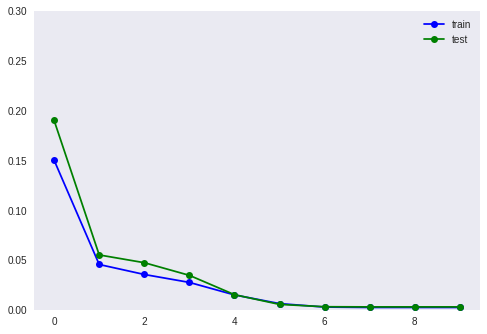

In [0]:
# TODO
dtest = np.array(range(0,10))
RSStest = []
RSStr = []

for d in dtest:
  beta_hat = poly.polyfit(xtr,ytr,d)
  
  yhat = poly.polyval(xtr,beta_hat)
  RSSd = np.mean((yhat-ytr)**2)
  RSStr.append(RSSd)
  
  yhat = poly.polyval(xts,beta_hat)
  RSSd = np.mean((yhat-yts)**2)
  RSStest.append(RSSd)
  
plt.plot(dtest,RSStr,'bo-')
plt.plot(dtest,RSStest,'go-')
plt.grid()
plt.ylim(0,0.3)
plt.legend(['train','test'], loc= 'upper right')

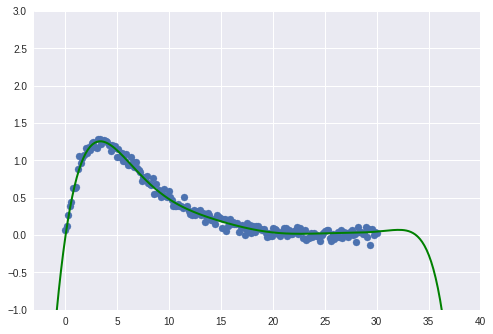

In [0]:
# TODO
xp = np.linspace(-3,40,200)
yp_hat = poly.polyval(xp, beta_hat)
plt.xlim(-3,40)
plt.ylim(-1,3)
plt.plot(xp,yp_hat,'g-', linewidth = 2)
plt.scatter(x,y)